# Pre-modeling +

--Variable Level	Variable naming convention - Does variables required renaming?

	Data types -Any mismatch in data types?							
	Does data have any special characters?							
		#NA, Nan, #Error, #Division, -inf, inf, 999999, etc.						
	Does data have any missing values?							
		Encoded missings with 0, 999999, unknown, not avaialable, NA etc						
	Does data any outliers							
		Reasons for outliers						
	Categorical variables - Ordinal vs. nominal							
		Converting categorical variables into numerical variables (encoding)						
			Ordinal 	Label/One-Hot encoding (dummy variables)				
			Nomianl	One-hot encoding				
	Does data having any date variables?							
		Derived variables out of Date variables						
	String variables - Extract variables out of string which can make sense							
	Does data have any duplicates?							
		Key level (one variable or combination of variable)						
		Record level						
	Derived variables - Definition							
	Exploratory analysis							
		Univariate		Distribution, variation etc				
		Bivariate		Relationships				
	Does variable having variance?							
		Near zero variance variable (CV<0.05)	

--Import Packages

In [9]:
#Packages(s) for Operating Systems::
import os


#Packages(s) for Data Importing & Manipulations::
import numpy as np
import pandas as pd
import datetime as dt
import pandas_profiling as pp
import re


#Packages(s) for Basic Statistic Analysis::
import scipy.stats as stats
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns


#Packages(s) for Model Building Part::
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess
import sklearn.feature_selection as feature_selection


#Packages(s) for building models::
#!pip install statsmodels
import statsmodels as st
import statsmodels.formula.api as smp
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


-- Importing Data

In [10]:
housingPrice = pd.read_csv(r'E:\AI\ALabs\Python - ML\Assignments-ML\2. Predicting House Prices\House_Prices.csv')
housingPrice.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


-- High level observation of imported data

In [11]:
housingPrice.info()
#Initial observations::
    #Here no variables have missing values.
    #Some of the variables are continuous (e.g., Home, Price etc.) and some of them are categorical (e.g., Brick, Neighborhood)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


-- List of columns

In [12]:
housingPrice.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

-- Pandas_profiling

In [13]:
profile_report = pp.ProfileReport(housingPrice)
profile_report.to_file(r'E:\AI\ALabs\Python - ML\Assignments-ML\2. Predicting House Prices\HousePricing_ProfileReport.html')

-- Preprocessing - droping unwanted columns


In [14]:
housingPrice.drop(['Home'], axis = 1, inplace = True)
housingPrice.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

-- Preprocessing - Separating Categorical & Numerical variables

In [15]:
##Categorical Variables
cat_vars = ['Brick','Neighborhood']

##Numerical Variables
num_vars = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']

data_cat = housingPrice[cat_vars]
data_num = housingPrice[num_vars]

display(data_cat.head())
display(data_num.head())

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East


,Price,SqFt,Bedrooms,Bathrooms,Offers
0,114300,1790,2,2,2
1,114200,2030,4,2,3
2,114800,1740,3,2,1
3,94700,1980,3,2,3
4,119800,2130,3,3,3


-- Preprocessing - Handling Outliers

In [16]:
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

data_num = data_num.apply(outlier_capping)
data_num.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers
0,114300,1790.0,2.0,2,2
1,114200,2030.0,4.0,2,3
2,114800,1740.0,3.0,2,1
3,94700,1980.0,3.0,2,3
4,119800,2130.0,3.0,3,3


-- Pre-processing -  Handle Missings in Continuous features

In [17]:
def Cont_Missing_Imputation(x):
    x = x.fillna(x.median())
    return x

data_num = data_num.apply(lambda x: Cont_Missing_Imputation(x))
data_num.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers
0,114300,1790.0,2.0,2,2
1,114200,2030.0,4.0,2,3
2,114800,1740.0,3.0,2,1
3,94700,1980.0,3.0,2,3
4,119800,2130.0,3.0,3,3


-- Pre-processing - Handle Missings in Categorical features

In [18]:
def Cat_Missing_Imputation(x):
    x = x.fillna(x.mode())
    return x

data_cat = data_cat.apply(lambda x: Cat_Missing_Imputation(x))
data_cat.head()

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East


In [19]:
data_final = pd.concat([data_num, data_cat],axis = 1)
data_final.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790.0,2.0,2,2,No,East
1,114200,2030.0,4.0,2,3,No,East
2,114800,1740.0,3.0,2,1,No,East
3,94700,1980.0,3.0,2,3,No,East
4,119800,2130.0,3.0,3,3,No,East


In [20]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         128 non-null    int64  
 1   SqFt          128 non-null    float64
 2   Bedrooms      128 non-null    float64
 3   Bathrooms     128 non-null    int64  
 4   Offers        128 non-null    int64  
 5   Brick         128 non-null    object 
 6   Neighborhood  128 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 7.1+ KB


-- Preprocessing - Dummy variables: droppig 1st dummy columns

In [21]:
data_final = pd.get_dummies(data_final,['Brick','Neighborhood'],drop_first = True)

display(data_final.head())

display(data_final.columns)

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,114300,1790.0,2.0,2,2,0,0,0
1,114200,2030.0,4.0,2,3,0,0,0
2,114800,1740.0,3.0,2,1,0,0,0
3,94700,1980.0,3.0,2,3,0,0,0
4,119800,2130.0,3.0,3,3,0,0,0


Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes',
       'Neighborhood_North', 'Neighborhood_West'],
      dtype='object')

-- Calculating CV for all the variables to exclude that are very small.

In [22]:
cv_vars = data_final.apply(lambda x: np.mean(x)/np.std(x))
cv_vars.to_csv(r'E:\AI\ALabs\Python - ML\Assignments-ML\2. Predicting House Prices\cv.csv')
cv_vars

Price                 4.980908
SqFt                  9.674452
Bedrooms              4.238853
Bathrooms             4.913538
Offers                2.463262
Brick_Yes             0.698836
Neighborhood_North    0.723747
Neighborhood_West     0.661968
dtype: float64

-- Dropping columns whose CV is very less. if (CV(col)<0.05) exclude them.

In [23]:
cv = cv_vars.apply(lambda x: x>0.05)
cv

#Here no feature has CV < 0.05, so no dropping any feature at this stage.

Price                 True
SqFt                  True
Bedrooms              True
Bathrooms             True
Offers                True
Brick_Yes             True
Neighborhood_North    True
Neighborhood_West     True
dtype: bool

# Pre-Modeling -

# Modeling - Data Preparation Step 1: Based on data audit +

-- Aggregate the data at customer level/store level/branch level based on business objective:

	  a. Joining multiple tables							
	  b. appending multiple tables							
	  c. creating new columns							
	  d. aggregate data							
	  e. Renaming the variables							
	  f. converting data types

In [24]:
        #   a. Joining multiple tables  : Not required here.                          
        #   b. appending multiple tables  : Not required here.                        
        #   c. creating new columns  : Not required here.                            
        #   d. aggregate data  : Not required here.                            
        #   e. Renaming the variables  : Not required here.                            
        #   f. converting data types  : Not required here.

-- Handling missing values:				

	a. Imputation with middle value (Mean, Median, Mode) or KNN Imputation, regression based imputation, MICE.
	b. Drop the variables or observations:								
		i. variables with more than 25% observations missings					
		ii. observations with more than 50 % of values of columns

In [25]:
# 	a. Imputation with middle value (Mean, Median, Mode) or KNN Imputation, regression based imputation, MICE.: Not Required.
# 	b. Drop the variables or observations: Not Required.
# 		i. variables with more than 25% observations missings: Not Required.
# 		ii. observations with more than 50 % of values of columns: Not Required.

-- Handling outliers:

	a. Identificiation of outliers using upper cap and lower cap					
	b. Method	LC	                    UC			
	           1	P1, P5	            P99, P95			
	           2	mean-3/2.5std	    mean+3/2.5std			
               3	Q1-1.5*IQR	        Q3+1.5*IQR			
						
	c. Less number of outliers, you can Cap or floor outliers					
	d. more number of outliers, build model for each group

In [26]:
# 	a. Identificiation of outliers using upper cap and lower cap: Not Required. 
# 	b. Method	LC	                UC			: Not Required.
# 	   1	    P1, P5	            P99, P95			
# 	   2	    mean-3/2.5std	    mean+3/2.5std			
#      3	    Q1-1.5*IQR	        Q3+1.5*IQR			
						
# 	c. Less number of outliers, you can Cap or floor outliers: Not Required.
# 	d. more number of outliers, build model for each group: Not Required.

--2.4 Converting categorical variables into numerical variables:

	a. Ordinal	Label encoding			
	b. Nominal	One-Hot encoding

In [27]:
# 	a. Ordinal	Label encoding: Not Required.
# 	b. Nominal	One-Hot encoding: Not Required.

# Modeling - Data Preparation Step 1: Based on data audit -

# Modeling - Data Preparation Step 2: Based on the technique +

--Apply transformations on X or Y depends on the situation

-- Assumptions of Linear Regression: If you don’t follow the assumptions, you may end up with model with overfitting or underfitting problems:

a. Y variable should follow normal distribution                
b. Y & Each X variable should have linear relationship                
c. No missings                
d. No outliers                
e. No multicollinierity                
f. No hetroscendasticity

-- Y variable should follow normal distribution

<AxesSubplot:>

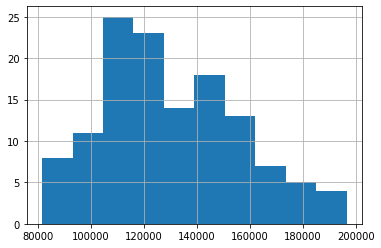

In [28]:
#Y value should be normally distributed
data_final.Price.hist()

-- Evaluating Best way of applying Transformation

<AxesSubplot:>

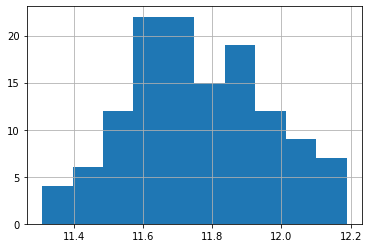

In [29]:
data_final['ln_Price'] = np.log(data_final.Price)
data_final.ln_Price.hist()
#So, compare to Y normal distribution, log transformation looks little better

E:\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ln_Price', ylabel='Density'>

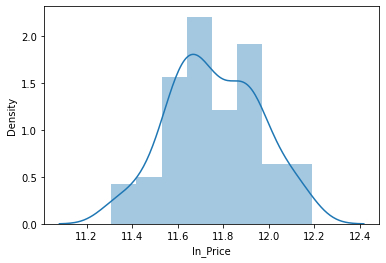

In [30]:
sns.distplot(data_final.ln_Price)

-- Looking at the assumptions - Linearity relationship between Y & Xs

In [31]:
corr_mat = data_final.corr() ##Correlation matrix...
corr_mat.to_csv(r'E:\AI\ALabs\Python - ML\Assignments-ML\2. Predicting House Prices\corr_mat.csv')
corr_mat

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,ln_Price
Price,1.000000,0.549070,0.523483,0.501744,-0.314728,0.452717,-0.551407,0.719472,0.992837
SqFt,0.549070,1.000000,0.481769,0.520577,0.338639,0.088258,-0.286627,0.247038,0.553127
Bedrooms,0.523483,0.481769,1.000000,0.384359,0.119065,0.038610,-0.365929,0.476137,0.506316
Bathrooms,0.501744,0.520577,0.384359,1.000000,0.182055,0.155127,-0.273551,0.271585,0.493268
Offers,-0.314728,0.338639,0.119065,0.182055,1.000000,-0.142766,0.329560,-0.329272,-0.326033
Brick_Yes,0.452717,0.088258,0.038610,0.155127,-0.142766,1.000000,-0.260554,0.115793,0.443745
Neighborhood_North,-0.551407,-0.286627,-0.365929,-0.273551,0.329560,-0.260554,1.000000,-0.479098,-0.562398
Neighborhood_West,0.719472,0.247038,0.476137,0.271585,-0.329272,0.115793,-0.479098,1.000000,0.697178
ln_Price,0.992837,0.553127,0.506316,0.493268,-0.326033,0.443745,-0.562398,0.697178,1.000000


-- Feature Selection - Will start eliminating the features that are big in numbers as of now

In [32]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               128 non-null    int64  
 1   SqFt                128 non-null    float64
 2   Bedrooms            128 non-null    float64
 3   Bathrooms           128 non-null    int64  
 4   Offers              128 non-null    int64  
 5   Brick_Yes           128 non-null    uint8  
 6   Neighborhood_North  128 non-null    uint8  
 7   Neighborhood_West   128 non-null    uint8  
 8   ln_Price            128 non-null    float64
dtypes: float64(3), int64(3), uint8(3)
memory usage: 6.5 KB


In [33]:
#Features means X variables, Target means Y - variable.
features = data_final[data_final.columns.difference(['ln_Price','Price'])]
#Difference of this will give features

target = data_final['ln_Price']

In [34]:
features

,Bathrooms,Bedrooms,Brick_Yes,Neighborhood_North,Neighborhood_West,Offers,SqFt
0,2,2.0,0,0,0,2,1790.0
1,2,4.0,0,0,0,3,2030.0
2,2,3.0,0,0,0,1,1740.0
3,2,3.0,0,0,0,3,1980.0
4,3,3.0,0,0,0,3,2130.0
...,...,...,...,...,...,...,...
123,3,3.0,1,0,0,3,1900.0
124,3,4.0,1,0,0,3,2160.0
125,2,2.0,0,1,0,2,2070.0
126,3,3.0,0,0,1,1,2020.0


In [35]:
target

0      11.646582
1      11.645707
2      11.650947
3      11.458469
4      11.693579
         ...    
123    11.692744
124    11.904292
125    11.639558
126    11.917724
127    11.732864
Name: ln_Price, Length: 128, dtype: float64

# Modeling - Data Preparation Step 2: Based on the technique -

# Modeling - Data Preparation Step 3: Feature Engineering - Feature selection - Variable reduction +

You can drop variables based on the data audit:

	If variables having lots of missings (>25%)					
	If nominal categorical having lots of categories (>25)					
	If variable having very less variation (CV<0.05)					
	Unique identifiers (Custid, Email, phone number, identification details)					
	Business understanding 					


In [36]:
# You can drop variables based on the data audit: Not required here.
# 	If variables having lots of missings (>25%): Not required here.
# 	If nominal categorical having lots of categories (>25): Not required here.
# 	If variable having very less variation (CV<0.05)					
# 	Unique identifiers (Custid, Email, phone number, identification details): Not required here.
# 	Business understanding: Not required here.

--Based on the relationships:

Based on Y & X relationships                    
    Statistical methods (Corr, chisquare, Anova)                
    RFE - Recursive Feature Elimination                
    SelectKbest - Selecting K best features                
    Univariate Models            f-regression    
        Y & X            

-- Now, will build the model & recursively eliminate the features.

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import itertools

lr = LinearRegression()

#RFE

#Create the RFE model & select 5 attributes.
rfe = RFE(lr, n_features_to_select=5)
rfe = rfe.fit(features,target)

In [38]:
features.columns

Index(['Bathrooms', 'Bedrooms', 'Brick_Yes', 'Neighborhood_North',
       'Neighborhood_West', 'Offers', 'SqFt'],
      dtype='object')

In [39]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [40]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False])

In [41]:
#So, rfe.support_ gives the 10 features to select. But such kind of feature selection sometimes not correct if we have 
#Multi-collinearity. As we see 'SqFt', etc have been eliminated above.

##To handle this problem, there are some techniques that handle multi-collinearity situation and provide important 
#features to consider. RandomForestRegressor() works here.

#Now, will build the model & recursively eliminate the features.
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import itertools

rfReg = RandomForestRegressor()

#RFE

#Create the RFE model & select 5 attributes.
rfe = RFE(rfReg, n_features_to_select=5)
rfe = rfe.fit(features,target)

features.columns
rfe.support_

array([ True, False,  True, False,  True,  True,  True])

In [42]:
#So, choosing top 5 features now
features.columns[rfe.support_]

Index(['Bathrooms', 'Brick_Yes', 'Neighborhood_West', 'Offers', 'SqFt'], dtype='object')

In [43]:
#F-Regression # Feature selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values = f_regression(features, target)
display(F_values)
display(p_values)

array([ 40.51550573,  43.43579131,  30.89399577,  58.28915514,
       119.1635147 ,  14.98650822,  55.5428819 ])

array([3.30768214e-09, 1.07930683e-09, 1.55243358e-07, 4.90518083e-12,
       6.18953887e-20, 1.72918935e-04, 1.28331763e-11])

In [44]:
itertools.zip_longest(features.columns, F_values, p_values)
f_reg_results = [(i,v,z) for i, v, z in itertools.zip_longest(features.columns, F_values, ['%.3f' % p for p in p_values])]
f_reg_results ## Tuple with Features with their F_values & p_values

[('Bathrooms', 40.515505730485934, '0.000'),
 ('Bedrooms', 43.435791312904364, '0.000'),
 ('Brick_Yes', 30.89399577207386, '0.000'),
 ('Neighborhood_North', 58.28915514047715, '0.000'),
 ('Neighborhood_West', 119.16351469614492, '0.000'),
 ('Offers', 14.986508221660753, '0.000'),
 ('SqFt', 55.54288189641334, '0.000')]

In [45]:
f_reg_results = pd.DataFrame(f_reg_results,columns=['Variable','F_Value', 'P_Value'])
f_reg_results.sort_values(by=['F_Value'], ascending = False, inplace = True)
f_reg_results.to_csv(r'E:\AI\ALabs\Python - ML\Assignments-ML\2. Predicting House Prices\f_reg_results.csv')
f_reg_results

#For F_Regression--> model building is not required
#Multi-collinearity is not for Bi-Variate. It's for Uni-variate


,Variable,F_Value,P_Value
4,Neighborhood_West,119.163515,0.000
3,Neighborhood_North,58.289155,0.000
6,SqFt,55.542882,0.000
1,Bedrooms,43.435791,0.000
0,Bathrooms,40.515506,0.000
2,Brick_Yes,30.893996,0.000
5,Offers,14.986508,0.000


In [46]:
#Whenever we see the Multi-collinearity, we should evaluate VIF to eliminate features.
#Below list came from excel file 'f_reg_results.csv'- columns
final_list = [
'Neighborhood_West',
'Neighborhood_North',
'SqFt',
'Bedrooms',
'Bathrooms',
'Brick_Yes',
'Offers'
]

from statsmodels.stats.outliers_influence import variance_inflation_factor #This library provides VIF
X = features[final_list] 
target

0      11.646582
1      11.645707
2      11.650947
3      11.458469
4      11.693579
         ...    
123    11.692744
124    11.904292
125    11.639558
126    11.917724
127    11.732864
Name: ln_Price, Length: 128, dtype: float64

In [47]:
#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

,VIF_Factor,Features
2,60.905710,SqFt
4,37.086275,Bathrooms
3,31.801929,Bedrooms
6,11.039705,Offers
0,2.466554,Neighborhood_West
1,2.129110,Neighborhood_North
5,1.634121,Brick_Yes


In [48]:
#We see above that VIF value is higher for 'SqFt' & 'Bathrooms' columns. So, will try to eliminate 1 feature at a time
#to see the effect.

#Will start considering 'Bathrooms' first as 'SqFt' is an important feature. 

final_list = [
'Neighborhood_West',
'Neighborhood_North',
'SqFt',
'Bedrooms',
#'Bathrooms',
'Brick_Yes',
'Offers'
]

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have come down significantly now.

,VIF_Factor,Features
2,36.033710,SqFt
3,31.488328,Bedrooms
5,10.908520,Offers
0,2.439270,Neighborhood_West
1,2.119273,Neighborhood_North
4,1.610924,Brick_Yes


In [49]:
#We see above that VIF value is higher for 'SqFt' & 'Bathrooms' columns. So, will try to eliminate 1 feature at a time
#to see the effect.

#Eliminating now Bedrooms after Bathrooms

final_list = [
'Neighborhood_West',
'Neighborhood_North',
'SqFt',
#'Bedrooms',
#'Bathrooms',
'Brick_Yes',
'Offers'
]

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have come down significantly now.

,VIF_Factor,Features
2,13.579241,SqFt
4,10.529542,Offers
0,2.079855,Neighborhood_West
1,2.072834,Neighborhood_North
3,1.606362,Brick_Yes


In [50]:
#We see above that VIF value is higher for 'SqFt' & 'Bathrooms' columns. So, will try to eliminate 1 feature at a time
#to see the effect.

#Eliminating now Offers  after Bathrooms, Bedrooms

final_list = [
'Neighborhood_West',
'Neighborhood_North',
'SqFt',
#'Bedrooms',
#'Bathrooms',
'Brick_Yes',
#'Offers'
]

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have come down significantly now.

,VIF_Factor,Features
2,3.586662,SqFt
1,1.955746,Neighborhood_North
0,1.898675,Neighborhood_West
3,1.588754,Brick_Yes


In [51]:
#So, we can say that it's an iterative process to eliminate the features.
#Also, by seeing last list of features along with VIF values, it seems that now there is no multi-collinearity left now.

#So, let's now what are our features available after removing the multi-collinearity
X

,Neighborhood_West,Neighborhood_North,SqFt,Brick_Yes
0,0,0,1790.0,0
1,0,0,2030.0,0
2,0,0,1740.0,0
3,0,0,1980.0,0
4,0,0,2130.0,0
...,...,...,...,...
123,0,0,1900.0,1
124,0,0,2160.0,1
125,0,1,2070.0,0
126,1,0,2020.0,0


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Neighborhood_West   128 non-null    uint8  
 1   Neighborhood_North  128 non-null    uint8  
 2   SqFt                128 non-null    float64
 3   Brick_Yes           128 non-null    uint8  
dtypes: float64(1), uint8(3)
memory usage: 1.5 KB


In [53]:
data_final1 = pd.concat([X,target],axis=1)
data_final1.head()

,Neighborhood_West,Neighborhood_North,SqFt,Brick_Yes,ln_Price
0,0,0,1790.0,0,11.646582
1,0,0,2030.0,0,11.645707
2,0,0,1740.0,0,11.650947
3,0,0,1980.0,0,11.458469
4,0,0,2130.0,0,11.693579


In [54]:
data_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Neighborhood_West   128 non-null    uint8  
 1   Neighborhood_North  128 non-null    uint8  
 2   SqFt                128 non-null    float64
 3   Brick_Yes           128 non-null    uint8  
 4   ln_Price            128 non-null    float64
dtypes: float64(2), uint8(3)
memory usage: 2.5 KB


# Modeling - Data Preparation Step 3: Feature Engineering - Feature selection - Variable reduction -

# Modeling - Data Preparation Step 4: +
--Split the data into Train (build) & Test (validate) 70:30			
	Train	SRS of 70% of total data			
	Test	SRS of 30% of remaining sample

In [55]:
#Now, we can split the data into train & test.
train,test =  train_test_split(data_final1, test_size=0.3,)
display(train.shape)
display(test.shape)

(89, 5)

(39, 5)

--Build the model on Train data (Development data)	

	All variables coming significant or not							
	Model possible or not							
	Having good goodness of fit metric (R^2)							
	Variables signs of coefficients are matching with individual correlations coeficients							
								
	Final mathematical equation & predict the value for train data	

In [56]:
#Let's see the available features 
display(X.columns)

#Now let's prepare the equation containing target & all features; to input to model.
eqn = 'ln_Price ~ ' + '+'.join(X.columns)
display(eqn)
eqn = 'ln_Price ~ Neighborhood_West+Neighborhood_North+SqFt+Brick_Yes'

Index(['Neighborhood_West', 'Neighborhood_North', 'SqFt', 'Brick_Yes'], dtype='object')

'ln_Price ~ Neighborhood_West+Neighborhood_North+SqFt+Brick_Yes'

--Metrics	R-Square						

		MAPE/RMSE/MSE/RMSPE						
								
		Corr(Actual, predicted) should be high						
		Corr(Actual, errors) should be low						
								
		Decile analysis		

In [57]:
#Let's use OLS method now...
ols_model = smp.ols(formula = eqn, data=train) #Here, equation & data is changed.
ols_model_output = ols_model.fit()

print(ols_model_output.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     86.20
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           6.41e-29
Time:                        23:48:05   Log-Likelihood:                 87.011
No. Observations:                  89   AIC:                            -164.0
Df Residuals:                      84   BIC:                            -151.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.0059      0

In [58]:
#Let's use OLS method now...
#We are reducing the features iteratively on the basis of P-value here. If p-value is high, will reduce that feature.
#Iterative feature reduction based on high p-value...
# Removing  Neighborhood_North

eqn = 'ln_Price ~ Neighborhood_West+SqFt+Brick_Yes'
ols_model = smp.ols(formula = eqn, data=train) #Here, equation & data is changed.
ols_model_output = ols_model.fit()

print(ols_model_output.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           1.40e-28
Time:                        23:48:05   Log-Likelihood:                 83.597
No. Observations:                  89   AIC:                            -159.2
Df Residuals:                      85   BIC:                            -149.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.9221      0.10

In [59]:
#Mathematical equation 
#ln_Price = 0.2478*Neighborhood_West + 0.0004*SqFt + 0.1540*Brick_Yes + 10.9176
##But above is not the actual mathematical equation. Actual eqn will be below, using exp().

#Price = exp(0.2478*Neighborhood_West + 0.0004*SqFt + 0.1540*Brick_Yes + 10.9176)

--Validate the model using test data (new data)								

	Predict value using mathematical equation finalized in the above step							
								
	Calculate all the below metrics for test data							
	Metrics	R-Square						
		MAPE/RMSE/MSE/RMSPE						
								
		Corr(Actual, predicted) should be high						
		Corr(Actual, errors) should be low						
								
		Decile analysis				

In [60]:
ols_model_output.predict(train)

118    11.766309
45     11.568769
28     11.493735
64     11.843954
107    11.744871
         ...    
5      11.558050
31     11.759163
20     11.561623
99     12.070079
104    11.604499
Length: 89, dtype: float64

In [61]:
#But above is not the actual train prediction, as Y should be exp(). i.e.
train_predicted = np.exp(ols_model_output.predict(train))
train_predicted

118    128837.715526
45     105743.192040
28      98099.268502
64     139239.990593
107    126105.069241
           ...      
5      104615.776011
31     127920.316525
20     104990.239394
99     174569.571337
104    109589.732599
Length: 89, dtype: float64

In [62]:
#Similarly, test predcition
test_predicted = np.exp(ols_model_output.predict(test))
test_predicted

98     149554.294129
124    138876.787798
96     132437.921979
78     118551.829263
22     101305.138569
119    109981.999842
18     117828.239256
121    110375.671173
2      103131.230722
101    124188.375439
42     112767.467710
41     138248.521381
49     117828.239256
67     114800.175930
50     135931.212920
117    109981.999842
52     119402.040807
46     112767.467710
105    175371.964413
90     142257.265357
109    117707.671717
54      99867.572726
32     143415.261365
35     116452.692429
110    102031.662982
106    118551.829263
11     125207.128261
17     112767.467710
82     172708.340092
127    123745.439033
53     117287.849710
62     158353.187254
25     125526.720098
51     107649.283044
30     185501.835950
65     110915.913592
123    126556.451745
37     170083.314729
95     167841.498906
dtype: float64

In [63]:
#Metrics (MAPE, RMSE, MSE, RMSPE)
train_actual = np.exp(train.ln_Price)
test_actual = np.exp (test.ln_Price)

In [64]:
#RMSE
##Error --
train_actual - train_predicted

##Square Error --
np.square(train_actual - train_predicted)

##Mean Square Error --
np.mean(np.square(train_actual - train_predicted))

##Root Mean Square Error --
train_RMSE = np.sqrt(np.mean(np.square(train_actual - train_predicted)))
display(train_RMSE)

#Similarly,
test_RMSE = np.sqrt(np.mean(np.square(test_actual - test_predicted)))
display(test_RMSE)

11604.753383441808

13213.412036067555

In [65]:
#RMSPE
train_RMSPE = np.sqrt(np.mean(np.square((train_actual-train_predicted)/train_actual)))
display(train_RMSPE)
test_RMSPE  = np.sqrt(np.mean(np.square((test_actual-test_predicted)/test_actual)))
display(test_RMSPE)

0.09705094456878822

0.1115550709342136

In [66]:
#So, now if we see that these matrix are similar that means we are now confident that level 1 validation is done.

--cross check if the metrics between train & test similar or not							
    
						
   Once ensured there is no problem of overfitting and underfitting, you can finalize the model

In [67]:
#Now co-relation between actual & predicted:
display(np.corrcoef(train_actual, train_predicted))
display(np.corrcoef(test_actual, test_predicted))

array([[1.        , 0.90584863],
       [0.90584863, 1.        ]])

array([[1.        , 0.83021426],
       [0.83021426, 1.        ]])

In [68]:
#Check
#Errors following normal distribution
#Errors should not have relationship with Y

train_errors = train_actual-train_predicted
display(train_errors)

test_errors = test_actual-test_predicted
display(test_errors)

118    21362.284474
45     -2543.192040
28    -16529.268502
64     -8939.990593
107     7894.930759
           ...     
5       9984.223989
31    -15620.316525
20     11209.760606
99     -3569.571337
104   -27289.732599
Length: 89, dtype: float64

98     -4054.294129
124     9023.212202
96       862.078021
78      2748.170737
22     -9605.138569
119     -281.999842
18     -6428.239256
121    -4775.671173
2      11668.769278
101    -1088.375439
42     -7167.467710
41     -4648.521381
49    -10328.239256
67     37099.824070
50     15168.787080
117     7818.000158
52     -2002.040807
46     17032.532290
105   -28471.964413
90       842.734643
109    -9007.671717
54    -18297.572726
32     -8415.261365
35       647.307571
110     9568.337018
106   -10051.829263
11     -2207.128261
17    -29167.467710
82     -7908.340092
127      854.560967
53     13512.150290
62      2946.812746
25     23773.279902
51    -16549.283044
30     -3501.835950
65       184.086408
123    -6856.451745
37    -23083.314729
95    -15341.498906
dtype: float64

E:\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

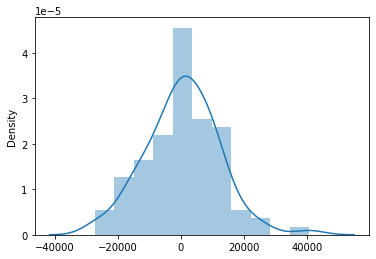

In [69]:
#By seeing above result, ideally the distribution should be Normal. If it is not then, we'll still have opportunity to furthure
#correct the model.
sns.distplot(train_errors)

#So, it is not Normal. Some skewness on right side, so still have scope to improve it further.

In [70]:
#Decile Analysis: Dividing data into 10 parts based on cut-offs(p10,p20,p30,..)
##Decile is used to avoid comparison between each actual & predicted values. It helps to create certain no. of bins (10 here),
##to see the comparison of different bins and to find out if actual & predicted values are increasing/decreasing in sync.

train_results = pd.concat([train_actual, train_predicted], axis=1)
test_results = pd.concat([test_actual, test_predicted], axis=1)
train_results.columns = ['actual', 'pred']
test_results.columns = ['actual', 'pred']

train_results['Deciles']=pd.qcut(train_results['pred'],10, labels=False)
train_results.groupby(['Deciles']).apply(mean)[['actual','pred']]

,actual,pred
Deciles,,
0,101474.444444,99946.836229
1,107572.727273,107738.776668
2,111755.555556,112505.853343
3,119971.428571,116164.504756
4,121333.333333,123544.301596
5,132250.000000,131115.223877
6,140033.333333,137958.342549
7,146722.222222,147872.836456
8,162888.888889,160717.080923


In [71]:
test_results['Deciles']=pd.qcut(test_results['pred'],10, labels=False)
test_results.groupby(['Deciles']).apply(mean)[['actual','pred']]

,actual,pred
Deciles,,
0,99917.5,101583.901250
1,106050.0,109497.238475
2,107525.0,112304.579180
3,127125.0,116562.097446
4,112175.0,118190.034260
5,121700.0,122445.285093
6,131325.0,127432.055521
7,143925.0,138828.446864
8,148575.0,154791.060414


In [72]:
import joblib

#from sklearn.externals import joblib
joblib.dump(ols_model_output, 'ols_model')

#### Lets save everything in metrics_df to pickle object
import pickle

# now you can save it to a file
with open(r'E:\AI\ALabs\Python - ML\Assignments-ML\2. Predicting House Prices\HousePricing_ols.pkl', 'wb') as f:
    pickle.dump(ols_model_output, f)
    
# and later you can load it
with open(r'E:\AI\ALabs\Python - ML\Assignments-ML\2. Predicting House Prices\HousePricing_ols.pkl', 'rb') as f:
    model = pickle.load(f)

In [73]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           1.40e-28
Time:                        23:48:06   Log-Likelihood:                 83.597
No. Observations:                  89   AIC:                            -159.2
Df Residuals:                      85   BIC:                            -149.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.9221      0.10

In [74]:
eqn = 'ln_Price ~ Neighborhood_West + SqFt + Brick_Yes'
#smp.ols(formula = 'y~x1+x2+x3+x4', data=data_final)

ols_model = smp.ols(formula = eqn, data=data_final)
ols_model_output = ols_model.fit()
print(ols_model_output.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           5.73e-38
Time:                        23:48:06   Log-Likelihood:                 115.00
No. Observations:                 128   AIC:                            -222.0
Df Residuals:                     124   BIC:                            -210.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.8930      0.08

# Modeling - Data Preparation Step 4 -